
#### Create a simple regressor model to predict  the weight of a person if the height is given as  input value.




In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot

In [2]:
dt=pd.read_csv('data/height_and_weight.csv')
dt

,Index,Height(In),Weight(lbs)
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30
...,...,...,...
195,196,65.80,120.84
196,197,66.11,115.78
197,198,68.24,128.30
198,199,68.02,127.47


In [3]:
dt.drop(columns=['Index'],inplace=True)

### Preparing data to train

In [4]:
X=dt.drop(columns=['Weight(lbs)'])
Y=dt['Weight(lbs)']

In [5]:
X

,Height(In)
0,65.78
1,71.52
2,69.40
3,68.22
4,67.79
...,...
195,65.80
196,66.11
197,68.24
198,68.02


array([[<AxesSubplot: title={'center': 'Height(In)'}>,
        <AxesSubplot: title={'center': 'Weight(lbs)'}>]], dtype=object)

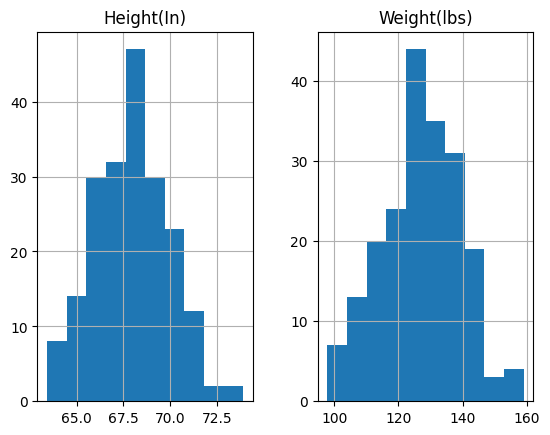

In [6]:
# Distribution of data
dt.hist()

array([<AxesSubplot: title={'center': 'Height(In)'}>,
       <AxesSubplot: title={'center': 'Weight(lbs)'}>], dtype=object)

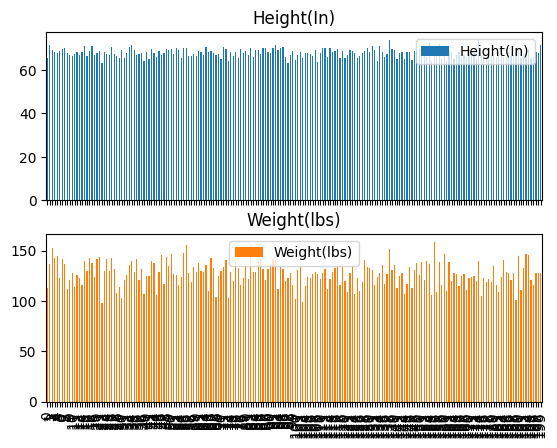

In [7]:
dt.plot.bar(subplots=True)

<AxesSubplot: >

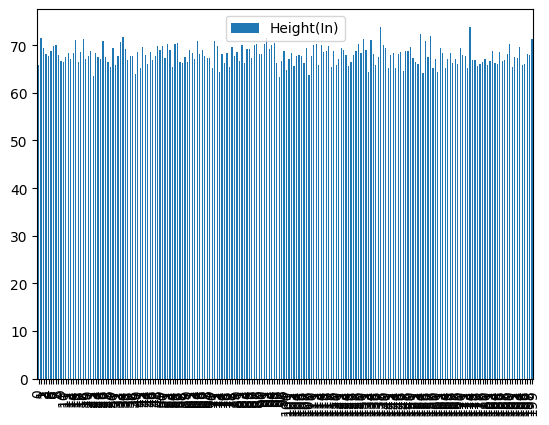

In [8]:
X.plot.bar()

### Predicting values

In [9]:
Model= LinearRegression()
Model.fit(X,Y)


LinearRegression()

In [10]:
Model.predict([[60]])

/Users/jigishap/.pyenv/versions/MachineLearning/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([99.93286131])

### Testing the performance of the model

In [11]:
dt=pd.read_csv('data/height_and_weight.csv')
dt.drop(columns=['Index'],inplace=True)

In [12]:


height= dt.drop(columns=['Weight(lbs)'])
weight= dt.drop(columns=['Height(In)'])

# Training and test set splitting
''' Option-1 Manual Method
# Training Set
inp_X=height.values[:180]
out_Y=weight.values[:180]

# Testing Set
tst_X=height.values[180:]
tst_Y=weight.values[180:]
'''

'''Option-2 (Better way)'''
from sklearn.model_selection import train_test_split
inp_X, tst_X, out_Y, tst_Y = train_test_split(height,weight, test_size=0.1)



In [13]:
Model= LinearRegression()
Model.fit(inp_X,out_Y)

LinearRegression()

In [14]:
pred_y=Model.predict(tst_X)

In [15]:
''' If using option -2 for Training & Test set splitting and covert tst_Y to numpy.ndarray as follows for plotting
default type is pandas.core.frame.DataFrame'''
print(type(tst_Y))
tst_Y=tst_Y.to_numpy()
print(type(tst_Y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


<AxesSubplot: >

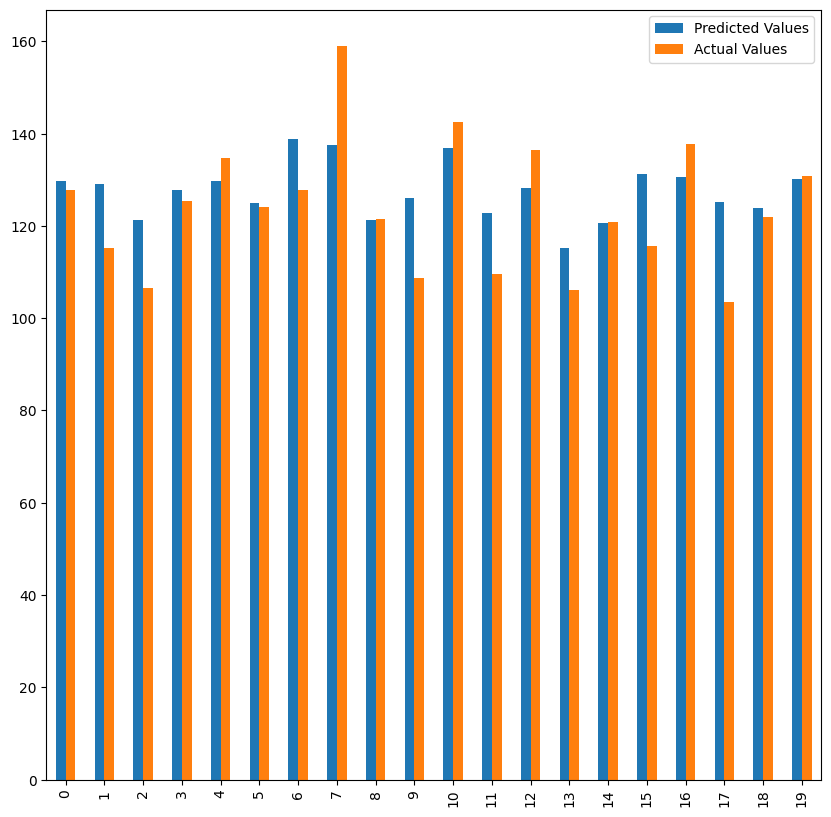

In [16]:

cmp=pd.DataFrame({'Predicted Values':pred_y.flatten(),
                  'Actual Values':tst_Y.flatten()})
cmp.plot.bar(figsize=(10,10))

### Working of a regresison model

In [17]:
import matplotlib.pyplot as plt

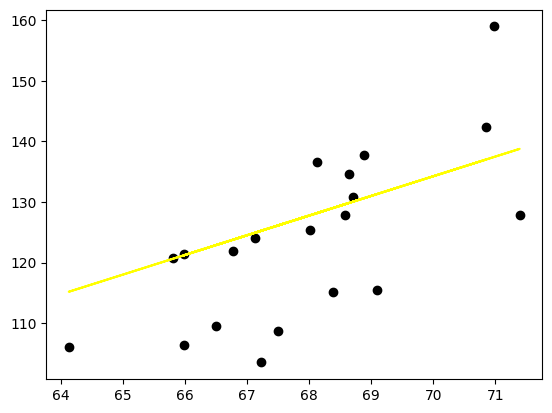

In [18]:
plt.scatter(tst_X,tst_Y,color ="Black")
plt.plot(tst_X,pred_y,color="yellow")


 


In [19]:
#Residual error : distance of point from regression line

from sklearn import metrics
me=metrics.max_error(tst_Y,pred_y) # Actual-predicted : farthest mistake is 21.39
mae=metrics.mean_absolute_error(tst_Y,pred_y)
print(me)
print(mae)

21.699525070199584
8.603398806365783
